# Decision Trees
* DT, olası sonuç için oluşturulabilecek karar yollarının oluşturulmasıdır. DT, Scale etmeye gerek duymaz.
* Karar ağaçlarının ilk hücrelerine kök (root veya root node) denir. Her bir gözlem kökteki koşula göre “Evet” veya “Hayır” olarak sınıflandırılır. Kök hücrelerinin altında düğümler (interval nodes veya nodes) bulunur. Her bir gözlem düğümler yardımıyla sınıflandırılır. Düğüm sayısı arttıkça modelin karmaşıklığı da artar. Karar ağacının en altında yapraklar (leaf nodes veya leaves) bulunur. Yapraklar, bize sonucu verir.
* Decision Tree Algoritmasının asıl meselesi kademeli olarak doğru özelliğin seçilerek en kısa yol ile doğru seçenek için %100'e yakın olasılığı bulmaktır. Bunu bulmak için her düğümde o düğüm için entropi hesaplanır. Entropi, bir verideki rastgeleliğin ölçülmesidir.
* Entropi ne kadar düşük olursa o veri seti o kadar homojen demektir.
* Entropi değeri nasıl kullanır? Direkt bu değeri kullanmak yerine Information Gain kullanılır. Information gain, her adımda doğru bilgiye ulaşma oranıdir. Entropi küçüldükçe Information Gain artar.
* `Entropi her seçenek için ayrı ayrı hesaplanırken Information gain node için hesaplanır. Hesaplarken bir parent node entropisiden altındaki child  node seçeneklerin entropisinden hesaplanan ağırlıklı entropi değeri çıkartılır. Sonuç olarak hangi düğümün Information Gain değeri daha yüksek ise öncelikli olarak o özelliklik root node olarak seçilir.`
* Gini: Alt kümenin saflık değeridir. Her sınıf için hesaplanır ve çıkan sonuçların karelerinin toplamı birden çıkartılır. Gini değeri 0 ile 1 arasında bir sonuç alır ve sonuç 0’a ne kadar yakınsa o kadar iyi ayrım yapmış olur. Kök (root) hücreyi bulabilmek için her düğüm için Gini değerini hesaplamamız gerekiyor. Gini ve Entropi arasında çok büyük bir fark yoktur. Entropi daha dengeli bir ağaç çıkarmaya meyilli iken Gini frekansı fazla olan sınıfı ayrıştırmaya meyillidir.
* Model overfit (aşırı uyum) olmuşsa genellikle önce max_depth hiperparametresi düşürülür.

# Random Forests

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
df = pd.read_csv('kyphosis.csv')
# kyphosis, kambur olma hastaligi

In [47]:
df.head()
# cocuklar uzerinde yapilan bir veri, age: ay bazinda
# number: ameliyatlara ait veri, kac omurgada problem var
# start: kacinci omurgadan itibaren mudahale edilecek
# kyphosis: hastalik var veya yok

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [49]:
df.describe()

Age     Number      Start
count   81.000000  81.000000  81.000000
mean    83.654321   4.049383  11.493827
std     58.104251   1.619423   4.883962
min      1.000000   2.000000   1.000000
25%     26.000000   3.000000   9.000000
50%     87.000000   4.000000  13.000000
75%    130.000000   5.000000  16.000000
max    206.000000  10.000000  18.000000

## EDA

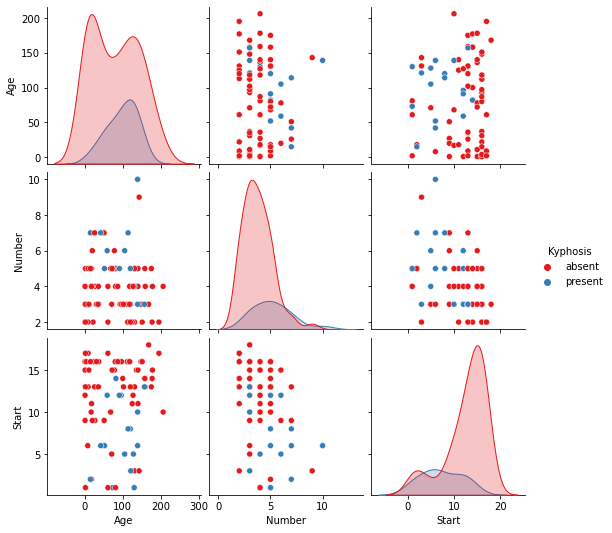

In [50]:
sns.pairplot(df,hue='Kyphosis',palette='Set1');

## Train Test Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)

## 1-Decision Trees Model

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [56]:
y_pred = model.predict(X_test)

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
print(confusion_matrix(y_test,y_pred))

[[15  2]
 [ 6  2]]


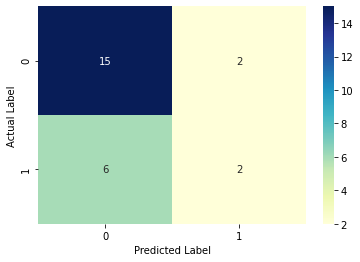

In [59]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

In [60]:
# R2 score
print(model.score(X,y)*100)

90.12345679012346


> Veri unbalanced ve yetersiz. accuracy e ve R2 ye bakilmaz. Recall ve F1 e bakilir

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      absent       0.71      0.88      0.79        17
     present       0.50      0.25      0.33         8

    accuracy                           0.68        25
   macro avg       0.61      0.57      0.56        25
weighted avg       0.65      0.68      0.64        25



## Tree Visualization

In [62]:
from sklearn import tree

In [63]:
df.head(2)

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14

In [64]:
features = list(df.columns[1:])
targets=y.unique()
print(f'features: {features}',
      f'targets: {targets}',sep="\n")

features: ['Age', 'Number', 'Start']
targets: ['absent' 'present']


In [65]:
y.value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

* Verinin unbalanced oldugu yukarida goruluyor

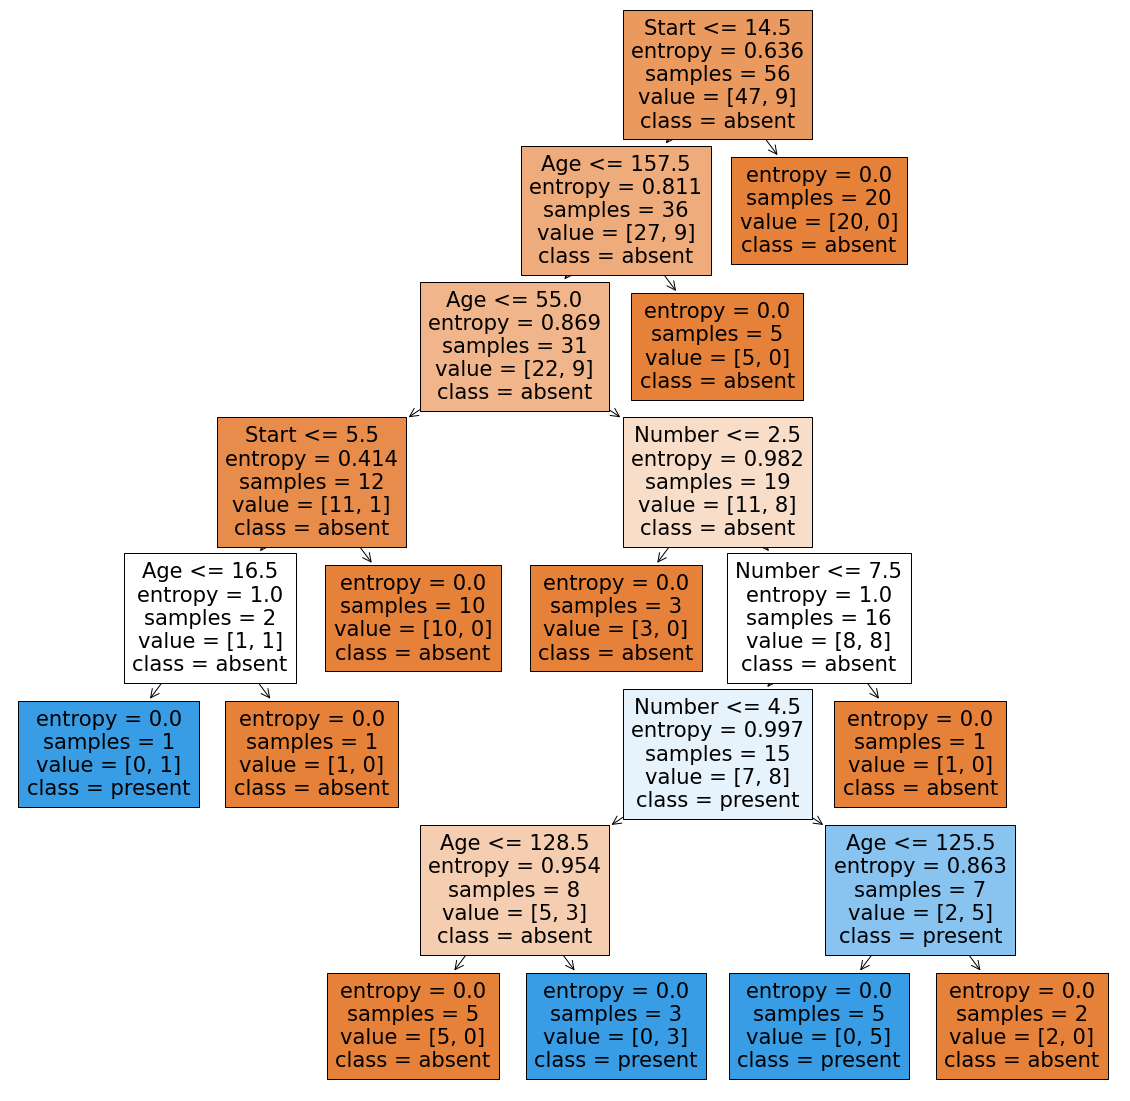

In [66]:
plt.figure(figsize=(20,20))
tree2 = tree.plot_tree(model,filled=True,feature_names=features ,class_names = targets)

* Gini Index, 0 (%0) ile 1 (%100) aralığındadır; 0, mükemmel eşitliği temsil eder ve 1, mükemmel eşitsizliği temsil eder. 
* Gini indeksi, rastgele seçilen bir öğenin ne sıklıkta yanlış tespit edildiğini ölçmek için kullanılan bir metriktir. 
* Düşük gini indeksi olan bir özellik tercih edilmelidir. Gini indeksi kategorik hedef değişkeni için başarılı veya başarısız olarak çalışır. 
* Gini indeks, yalnızca ikili bölmeleri (binary: 1 veya 0) gerçekleştirir ve yüksek gini indeksi homojenliği artırır. 

## 2-Random Forests

In [64]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
y_pred = model.predict(X_test)

In [66]:
print(confusion_matrix(y_test,y_pred))

[[17  0]
 [ 7  1]]


In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      absent       0.71      1.00      0.83        17
     present       1.00      0.12      0.22         8

    accuracy                           0.72        25
   macro avg       0.85      0.56      0.53        25
weighted avg       0.80      0.72      0.64        25



## Tree Visualization

In [68]:
fn=features
cn=targets
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=800)
tree.plot_tree(model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf.png')